In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.stats import multivariate_t
from utils import *

seed = 42

# Define sample sizes and number of runs
sample_sizes = [50, 100, 150, 200, 250, 300]
num_outer_runs = 25 # Number of times to repeat the experiment for each sample size
significance_level = 0.05

In [2]:
d = 10
param = 0.5
indices = np.arange(d)
cov = param ** np.abs(indices[:, None] - indices[None, :])

x_mean = np.zeros(d); y_mean = np.zeros(d)
x_cov = cov
y_cov = 1.3 * cov


X_distribution = multivariate_normal(x_mean, x_cov)
Y_distribution = multivariate_normal(y_mean, y_cov)

In [3]:
# Compute empirical power over sample sizes
power_results = compute_power_over_sample_sizes(
    X_distribution, Y_distribution, sample_sizes, num_outer_runs, significance_level, Kernel = RBF_Kernel, seed = seed
)

Sample size 50:   0%|          | 0/25 [00:00<?, ?it/s]

Sample size 300: 100%|██████████| 25/25 [00:09<00:00,  2.75it/s]


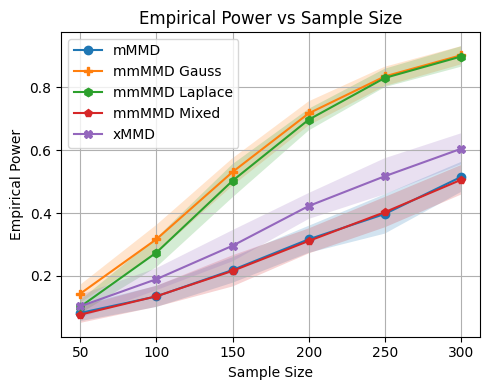

In [4]:
test_names = [k for k in power_results]
markers = ['o', 'P', 'h','p', 'X']

custom_labels = {
    'mmd': 'MMD',
    'mMMD': 'mMMD',
    'multiple_mMMD_g':'mmMMD Gauss', 
    'multiple_mMMD_l':'mmMMD Laplace',
    'multiple_mMMD_gl':'mmMMD Mixed',
    'LMMD': 'LMMD',
    'BTest': 'BMMD',
    'CrossMMD': 'xMMD'
}

plt.figure(figsize=(5, 4))

for i, test_name in enumerate(test_names):
    results = power_results[test_name]
    means = np.array(results['mean'])
    stds = np.array(results['std'])
    lower = means - stds
    upper = means + stds

    plt.plot(sample_sizes, means, 
             label=custom_labels.get(test_name, test_name),
             marker=markers[i % len(markers)])
    plt.fill_between(sample_sizes, lower, upper, alpha=0.2)

plt.xlabel("Sample Size")
plt.ylabel("Empirical Power")
plt.title("Empirical Power vs Sample Size")
plt.legend(loc = "center", bbox_to_anchor = (0.22,0.8))
plt.grid(True)

plt.tight_layout()
plt.savefig("gauss_multi_mMMD_cov_05_mult_13.pdf", dpi=1200)
plt.show()
